In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

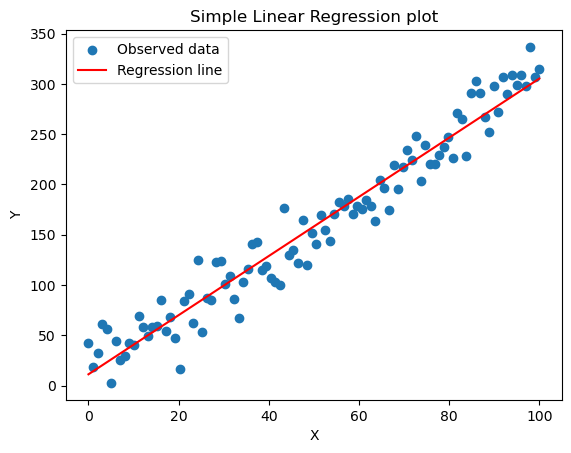

In [36]:
class SimpleLinearRegression(object):
    def __init__(self):
        self.beta0 = 0.0
        self.beta1 = 0.0

    def calculateCoefficients(self, xTrain: np.ndarray, yTrain: np.ndarray):
        xMean = np.mean(xTrain)
        yMean = np.mean(yTrain)
        beta1Estimate = 0.0
        for xi, yi in zip(xTrain, yTrain):
            beta1Estimate += (xi - xMean) * (yi - yMean)
        beta1Estimate = beta1Estimate / (np.var(xTrain) * np.size(xTrain))
        beta0Estimate = yMean - beta1Estimate * xMean
        self.beta0 = beta0Estimate
        self.beta1 = beta1Estimate

# Generate linear test data
np.random.seed(0)
x = np.linspace(0, 100, 100)
y = 3 * x + 7 + np.random.randn(100) * 20  # Linear relationship with noise

# Fit the linear regression model
linearRegression = SimpleLinearRegression()
linearRegression.calculateCoefficients(x, y)

# Predicted values
ycap = linearRegression.beta1 * x + linearRegression.beta0

# Plotting the data and the regression line
plt.scatter(x, y, label='Observed data')
plt.plot(x, ycap, color='red', label='Regression line')
plt.title("Simple Linear Regression plot")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Estimated coefficients: [3.05725163 1.78685022 1.01478753]
True coefficients: [3 2 1]


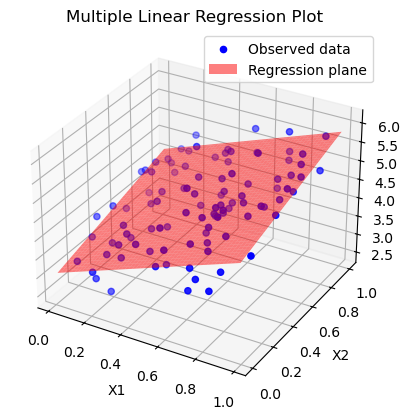

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MultipleLinearRegression(object):
    def __init__(self):
        self.Beta = None

    def calculateCoeff(self, xObserved: np.ndarray, yObserved: np.ndarray) -> np.ndarray:
        X = np.copy(xObserved)
        # Stack the intercept term correctly
        X = np.hstack((np.ones((X.shape[0], 1)), X))  
        self.Beta = np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T, X)), X.T), yObserved)
        return self.Beta

# Create sample data
np.random.seed(0)
X = np.random.rand(100, 2)
betaTrue = np.array([3, 2, 1])
y = np.dot(np.hstack((np.ones((X.shape[0], 1)), X)), betaTrue) + np.random.randn(100) * 0.5

# Initialize and fit the model
model = MultipleLinearRegression()
betaEstimated = model.calculateCoeff(X, y)

print("Estimated coefficients:", betaEstimated)
print("True coefficients:", betaTrue)

# Plotting the results in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:, 0], X[:, 1], y, color = 'blue', label = 'Observed data')

# Create a mesh grid for plotting the regression plane
xSurf, ySurf = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100),
                             np.linspace(X[:, 1].min(), X[:, 1].max(), 100))

zSurf = betaEstimated[0] + betaEstimated[1] * x_surf + betaEstimated[2] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color = 'red', alpha = 0.5, label = 'Regression plane')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title("Multiple Linear Regression Plot")
ax.legend()
plt.show()